# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xgboost as xgb
from typing import Union, Tuple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F

# Criando minha classe para avaliar os dados e testagem

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.drop(columns = 'id', inplace = True)

In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Distribuicao dos diagnosticos

Porcentagem de diagnosticos benignos e de: 62.741652021089635
Porcentagem maligno: 37.258347978910365


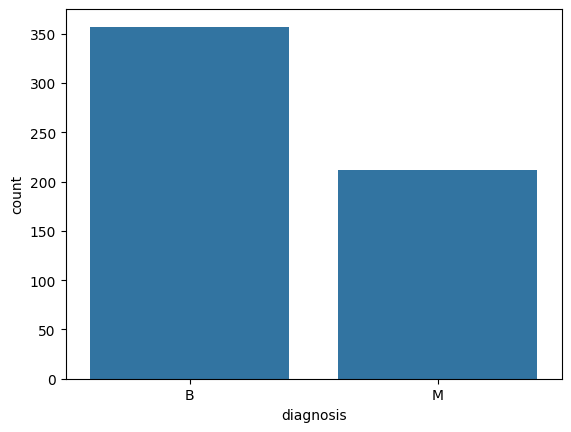

In [6]:
valores = df.diagnosis.value_counts()
sns.barplot(x = valores.index, y = valores);
print(f'Porcentagem de diagnosticos benignos e de: {(valores.iloc[0]/(valores.iloc[0] + valores.iloc[1])) * 100}\nPorcentagem maligno: {(valores.iloc[1]/(valores.iloc[0] + valores.iloc[1])) * 100}')

# Analise univariada

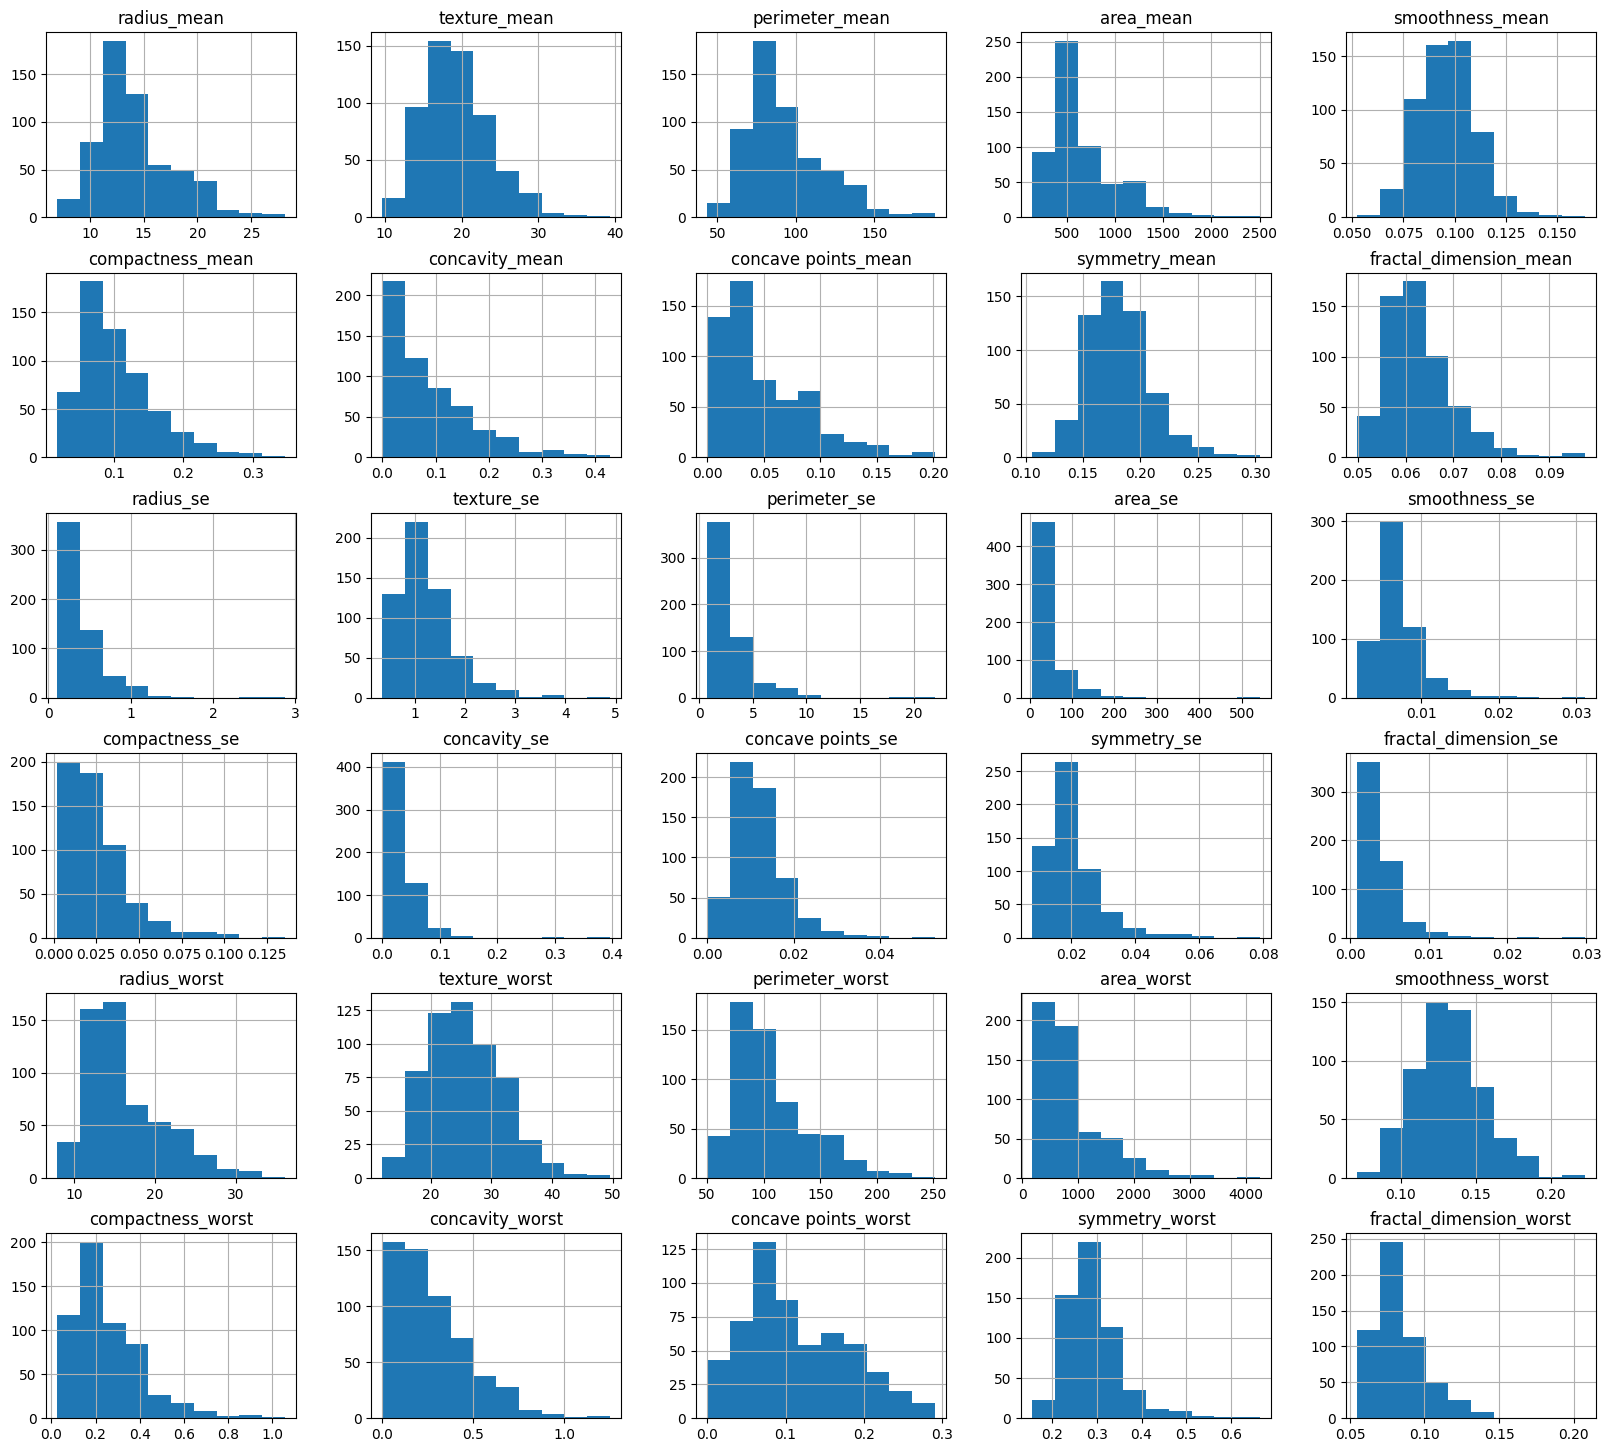

In [7]:
df.hist(figsize = (20, 18));

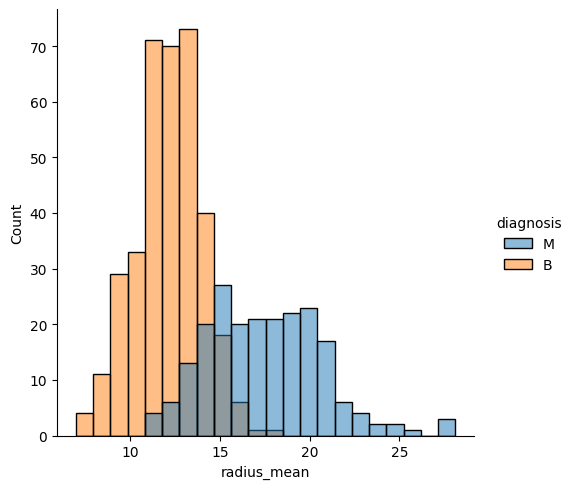

In [8]:
sns.displot(data = df, x = 'radius_mean', hue = 'diagnosis', kind = 'hist')

# Analise bivariada

In [9]:
benign = df[df['diagnosis'] == 'B']
malign = df[df['diagnosis'] == 'M']

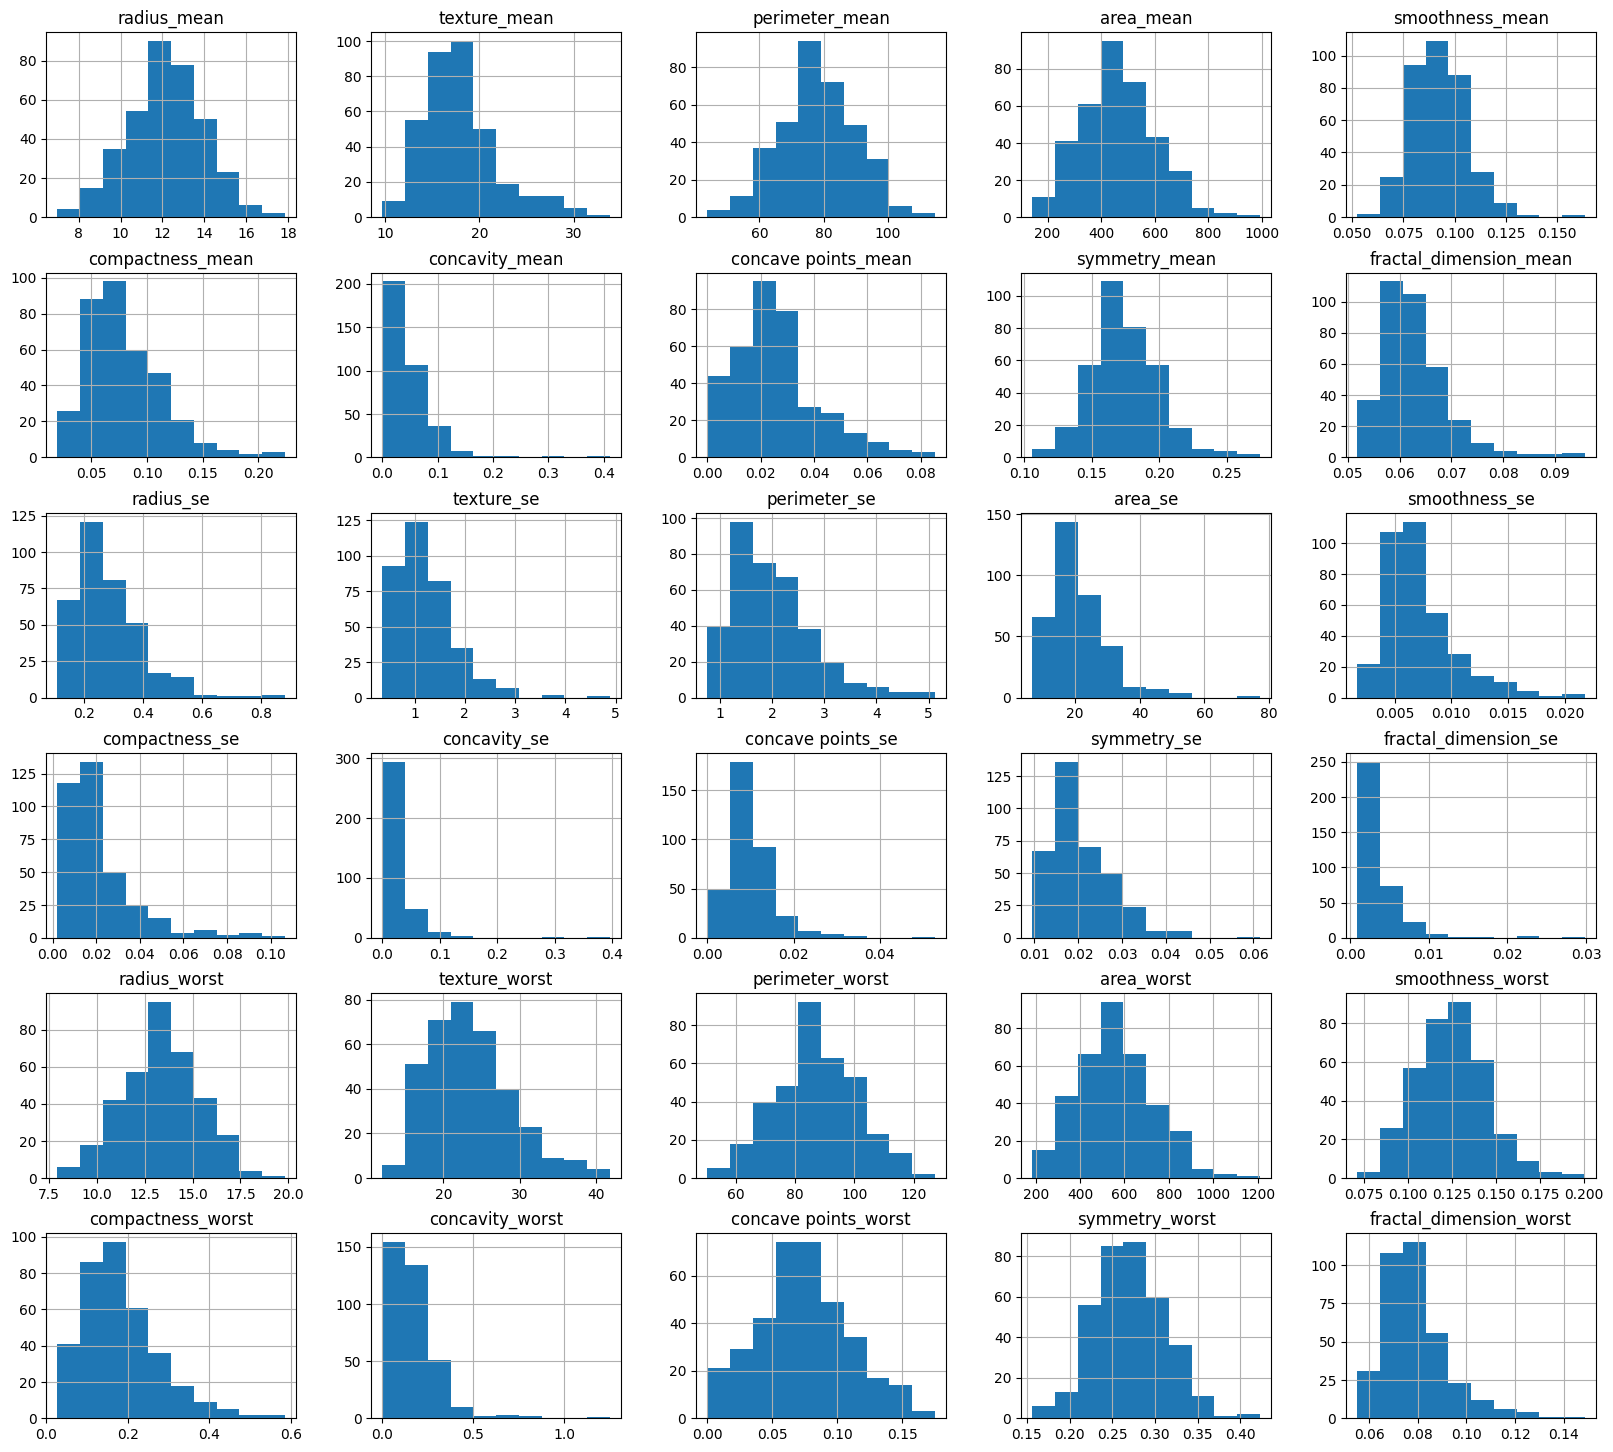

In [10]:
benign.hist(figsize = (20, 18));

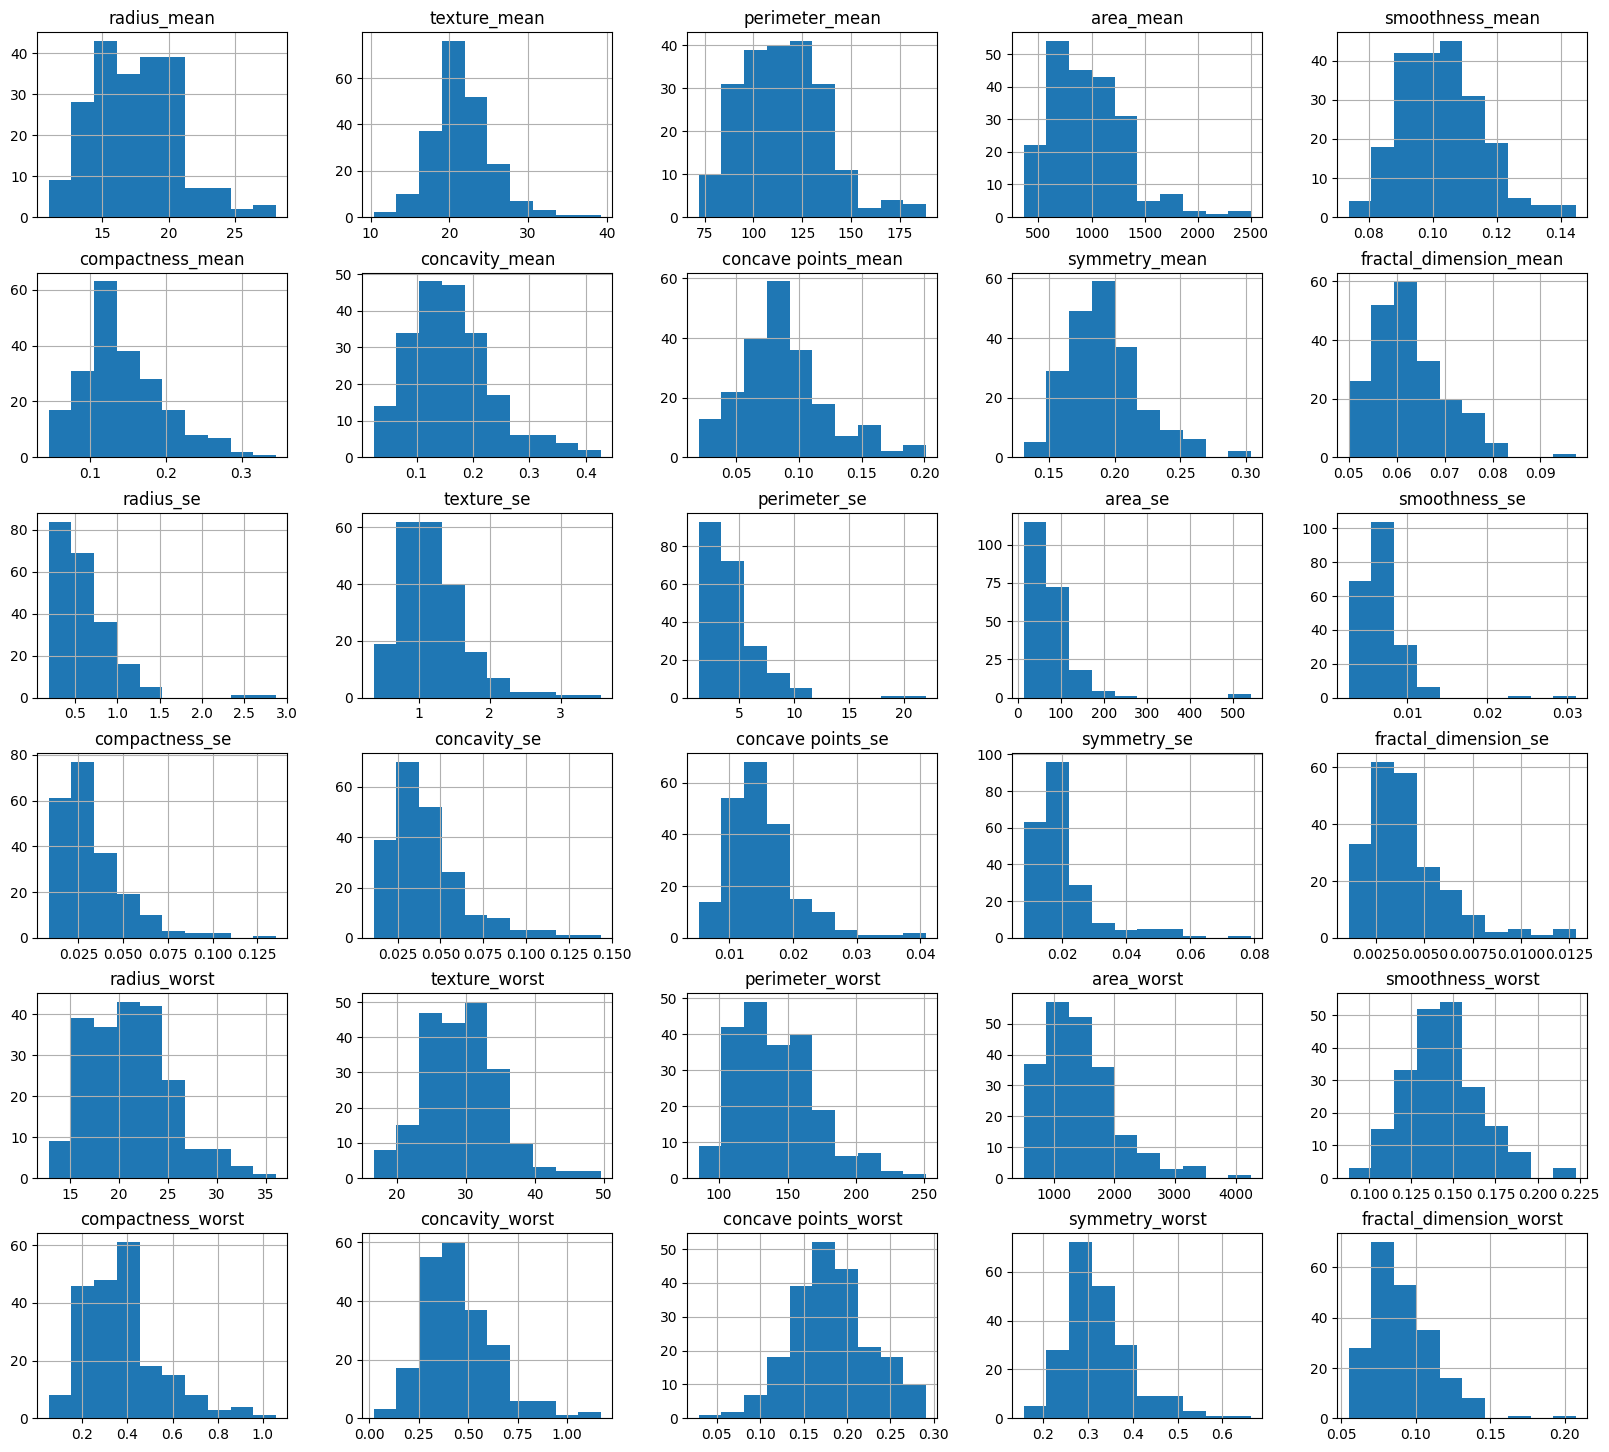

In [11]:
malign.hist(figsize = (20, 18));

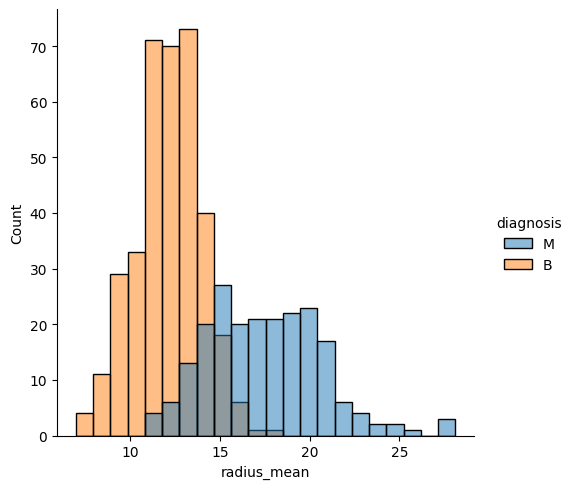

In [12]:
sns.displot(data = df, x = 'radius_mean', hue = 'diagnosis', kind = 'hist')

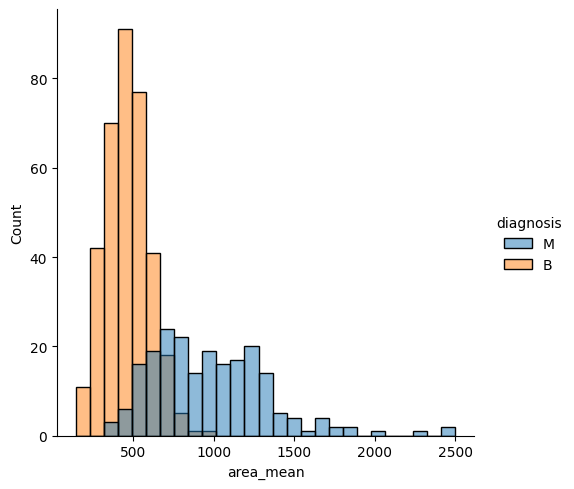

In [13]:
sns.displot(data = df, x = 'area_mean', hue = 'diagnosis', kind = 'hist')

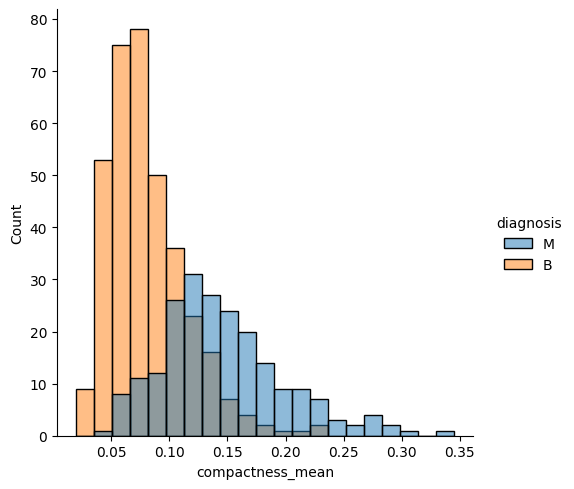

In [14]:
sns.displot(data = df, x = 'compactness_mean', hue = 'diagnosis', kind = 'hist')

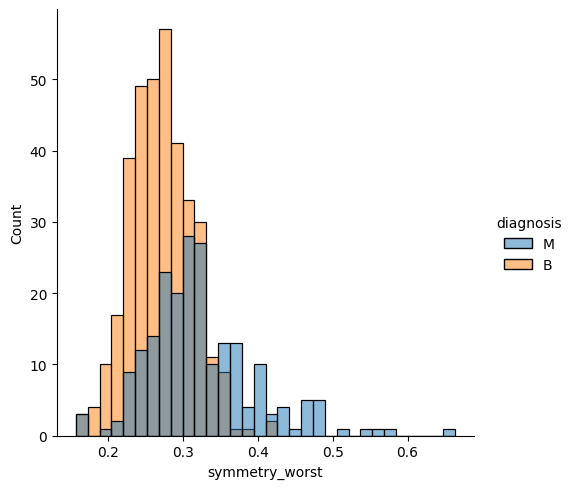

In [15]:
sns.displot(data = df, x = 'symmetry_worst', hue = 'diagnosis', kind = 'hist')

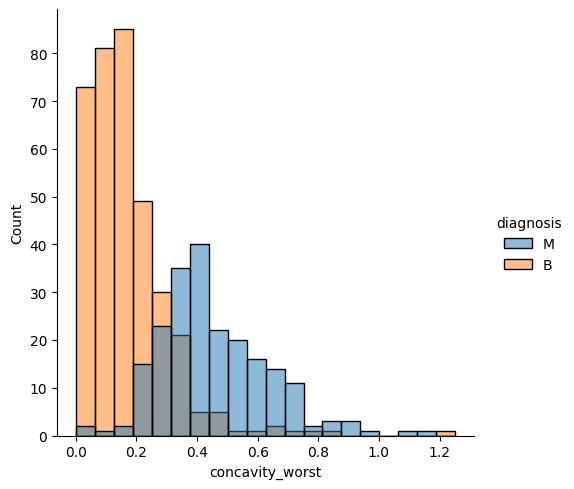

In [16]:
sns.displot(data = df, x = 'concavity_worst', hue = 'diagnosis', kind = 'hist')

Text(0.5, 1.0, 'Fractal dimension worst')

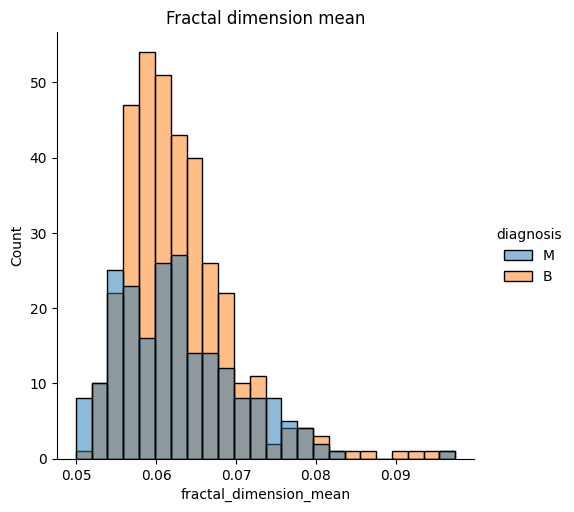

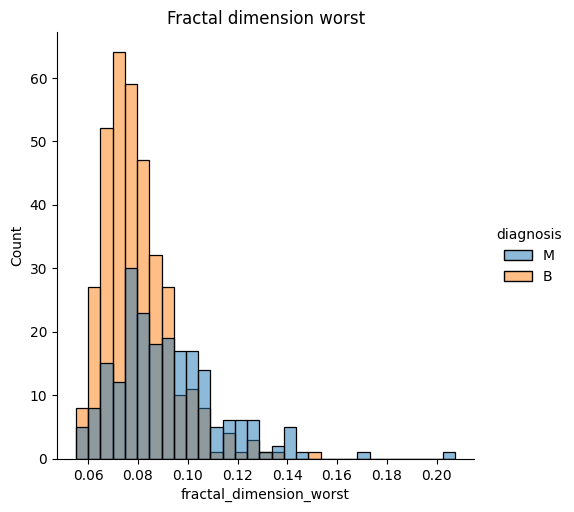

In [17]:
sns.displot(data = df, x = 'fractal_dimension_mean', hue = 'diagnosis', kind = 'hist')
plt.title('Fractal dimension mean')
sns.displot(data = df, x = 'fractal_dimension_worst', hue = 'diagnosis', kind = 'hist')
plt.title('Fractal dimension worst')

## Parecem me seguir uma distribuicao quasen normal muitas vezes

In [18]:
mapa = {'M':1, 'B':0}
df.diagnosis = df.diagnosis.map(mapa)

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


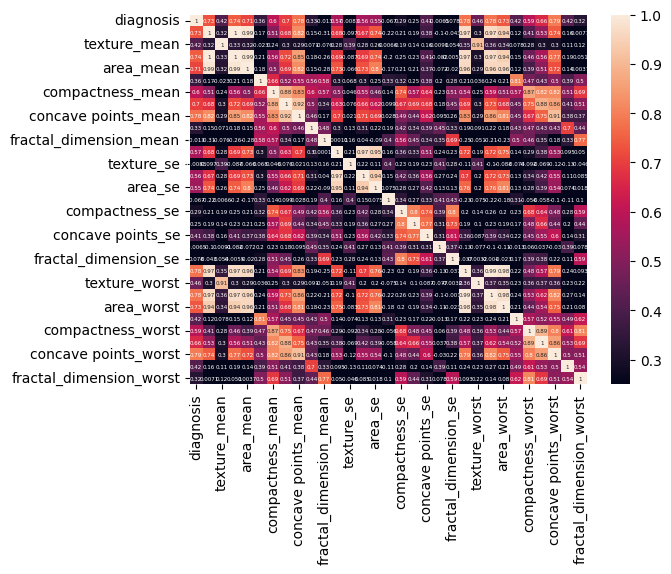

<Figure size 2000x1800 with 0 Axes>

In [20]:
correlacao = df.corr()

sns.heatmap(correlacao, vmin = 0.25, vmax = 1, annot = True, annot_kws = {'fontsize':4})
plt.figure(figsize = (20, 18))
plt.show()

correlacao = abs(correlacao.diagnosis)
correlacao_relevancia = correlacao[correlacao > 0.25]

In [21]:
nomes = list(correlacao_relevancia.index)
nomes.remove('diagnosis')

In [22]:
nomes

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [23]:
X = df[nomes]
y = df.diagnosis

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

# Convertendo tudo para OOP

In [33]:
class MyData:
    def __init__(self, csv: str, scaler = StandardScaler()):
        self.df = pd.read_csv(csv)
        self.df_evaluation = pd.DataFrame()
        self.scaler = scaler
        self.correlacao = None
        self.modulo_correlacao = None
        self.features_importantes = []
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.modelos = []

    def preparando_para_splittar(self, threshold_de_importancia:float = 0.20) -> Tuple[pd.DataFrame, pd.DataFrame]:
        mapa = {'M':1, 'B':0}
        self.df.diagnosis = self.df.diagnosis.map(mapa)

        self.df.drop(columns = 'id')
        self.correlacao = self.df.corr()
        self.modulo_correlacao = abs(correlacao)

        self.modulo_correlacao = self.modulo_correlacao[self.modulo_correlacao > threshold_de_importancia]
        self.features_importantes += list(self.modulo_correlacao.index)
        self.features_importantes.remove('diagnosis')

        self.X = self.df[self.features_importantes]
        self.y = self.df.diagnosis
        return self

    def preparando_para_evaluation(self, test_size:float = 0.20, random_state = 42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, random_state = random_state)
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        return self

    def evaluate(self, model, nome) -> pd.DataFrame:
        model.fit(self.X_train, self.y_train)
        y_hat = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_hat)
        f1 = f1_score(self.y_test, y_hat)
        precision = precision_score(self.y_test, y_hat)
        recall = recall_score(self.y_test, y_hat)
        temp = pd.DataFrame({'Accuracy':accuracy, 'F1':f1, 'Precision':precision, 'Recall':recall}, index = [nome])
        return temp

    def adicionar_modelo_ml(self, modelo_e_nome: Tuple):
        self.modelos.append({'modelo':modelo_e_nome[0], 'nome':modelo_e_nome[1]})
        return self

    def criar_dataframe_de_evaluation(self):
        for modelo in self.modelos:
            temp = self.evaluate(modelo['modelo'], modelo['nome'])
            self.df_evaluation = pd.concat([self.df_evaluation, temp])
        return self


In [34]:
dados = MyData('breast-cancer.csv')

## Fazendo todo preprocessamento em uma linha

In [28]:
meus_dados_transformados = dados.preparando_para_splittar().preparando_para_evaluation()\
                            .adicionar_modelo_ml((LogisticRegression(), 'Regressao logistica')).adicionar_modelo_ml((DecisionTreeClassifier(), 'Arvore de decisao'))\
                            .adicionar_modelo_ml((RandomForestClassifier(), 'Random Forest')).adicionar_modelo_ml((xgb.XGBClassifier(), 'XGBoost'))\
                            .criar_dataframe_de_evaluation()

In [29]:
meus_dados_transformados.df_evaluation

,Accuracy,F1,Precision,Recall
Regressao logistica,0.973684,0.964706,0.976190,0.953488
Arvore de decisao,0.938596,0.919540,0.909091,0.930233
Random Forest,0.964912,0.952381,0.975610,0.930233
XGBoost,0.956140,0.941176,0.952381,0.930233


In [30]:
X_train == dados.X_train

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [31]:
X_test == dados.X_test

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [32]:
y_test == dados.y_test

204    True
70     True
131    True
431    True
540    True
       ... 
486    True
75     True
249    True
238    True
265    True
Name: diagnosis, Length: 114, dtype: bool